# Multiomics Survival Prediction

For this project, we will be using the followin preprocessed data available at Mendeley data repository.

###### [CT‑based radiogenomics for improving survival prediction in locally advanced head and neck squamous cell carcinoma with neoadjuvant therapy](https://data.mendeley.com/datasets/7gzyzmn54s/1)

- Published: 3 March 2025
- Version 1 | DOI:10.17632/7gzyzmn54s.1
- Contributor: Li Zheng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import missingno as msno

In [2]:
from pathlib import Path
current_dir = Path.cwd()
data_dir = f'{current_dir.parent.parent}/data/ct_based_radio_genomics__'

We have the preprocessed data as published on Mendeley. According to the data providesrs, (Li et al), 

##### Initial consideration
``` 
- 264 patients from Capital Medical University
- 95 patients from TCIA database
- Total 359 patients

```
##### After exclusion criteria

- Total of 244 patients 
- 106 patients for training, 
- 45 patients for internal testing 
- 93 patients from TCIA for external testing.

Let's check the data files ... 

In [3]:
clinical_csv = "Clinical_sub_features.csv" 
radio_csv = "Radio_sub_features.csv"
rna_csv = "RNA_sub_features.csv" 

In [4]:
clinical_df = pd.read_csv(f"{data_dir}/{clinical_csv}")
radiomics_df = pd.read_csv(f"{data_dir}/{radio_csv}")
rna_features_df = pd.read_csv(f"{data_dir}/{rna_csv}") 

print("Dataset shapes:")
print(f"Clinical: {clinical_df.shape}")
print(f"Radiomics: {radiomics_df.shape}")
print(f"RNA Features: {rna_features_df.shape}")

Dataset shapes:
Clinical: (151, 6)
Radiomics: (244, 11)
RNA Features: (151, 12)


That, means 
- Radiomics was from all  244 patients(internal and external), 
- genomics and clinical data is only from 151 internal source.

#### Also, not sure if they are ordered based on the patients...  We can check that later on...

Being a preprocessed data, data data looks clean with no missing values. 

In [5]:
# Lets just see if they have common IDs.
print("Clinical patient IDs sample:", clinical_df.iloc[:,0].head().tolist())
print("Radiomics patient IDs sample:", radiomics_df.iloc[:,0].head().tolist())
print("RNA Features patient IDs sample:", rna_features_df.iloc[:,0].head().tolist())

Clinical patient IDs sample: [1, 2, 3, 4, 5]
Radiomics patient IDs sample: [1, 2, 3, 4, 5]
RNA Features patient IDs sample: [1, 2, 3, 4, 5]


In [6]:
clinical_df

,Unnamed: 0,label,OS.time,"gender(M=1,F=2)",R_M,"Neoadjuvant Treatment(PD=0,SD=1,PR=2,CR=3)"
0,1,1,462,-0.659047,1.748469,0.494747
1,2,1,283,-0.659047,1.748469,-2.698617
2,3,1,415,-0.659047,1.748469,0.494747
3,4,1,1134,1.517342,-0.571929,-1.634163
4,5,0,722,-0.659047,-0.571929,0.494747
...,...,...,...,...,...,...
146,147,0,1527,-0.659047,-0.571929,0.494747
147,148,1,321,-0.659047,1.748469,0.494747
148,149,0,1699,-0.659047,-0.571929,0.494747
149,150,0,1157,-0.659047,-0.571929,0.494747


In [7]:
radiomics_df

,ID,label,OS_time,image_lbp-3D-k_glrlm_RunLengthNonUniformity,image_wavelet-HHH_glszm_ZoneEntropy,image_wavelet-LLL_glcm_DifferenceEntropy,image_wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis,image_lbp-2D_firstorder_Kurtosis,image_square_glcm_MCC,image_wavelet-HLL_glcm_InverseVariance,image_square_firstorder_InterquartileRange
0,1,1,462,-0.071964,-0.044837,0.000262,-0.070840,0.177975,0.308098,-0.129565,0.443081
1,2,1,283,0.373073,0.048817,0.211224,0.026160,0.428790,-0.390456,-0.197842,-0.054311
2,3,1,415,0.112022,-0.120078,0.243251,-0.097811,0.674827,-0.568433,-0.142627,0.607879
3,4,1,1134,-0.006742,-0.089081,0.087704,-0.075051,0.114591,0.308098,-0.089778,0.073420
4,5,0,722,-0.002064,-0.078758,0.147957,-0.114088,-0.071641,-0.608535,0.015753,-0.032975
...,...,...,...,...,...,...,...,...,...,...,...
239,240,1,572,0.114804,-0.013404,0.257810,-0.135995,0.308754,0.308098,-0.184717,0.387427
240,241,1,243,0.205161,0.016838,0.446647,-0.098236,0.334119,-0.487413,-0.006692,0.509147
241,242,1,393,0.246889,0.049549,0.170292,-0.090429,0.011879,0.308098,-0.026840,-0.104711
242,243,1,144,-0.155435,-0.104654,-0.088743,-0.061518,0.079747,0.308098,-0.093151,-0.213328


In [8]:
rna_features_df

,Unnamed: 0,label,OS_time,CDKN2A-AS1,ANXA8,LINC01504,RGS5,SPRYD7,KCNK15-AS1,TRAV10,RP11-466A19.8,RNAsignature
0,1,1,462,0.000000,0.139659,0.276243,0.104165,0.691827,0.024691,0.019608,0.208333,0.58848
1,2,1,283,0.011236,0.474489,0.044199,0.000000,0.534615,0.530864,0.000000,0.083333,0.94643
2,3,1,415,0.000000,0.473773,0.320442,0.054595,0.400962,0.283951,0.000000,0.166667,0.90785
3,4,1,1134,0.157303,0.404269,0.033149,0.017437,0.250481,0.086420,0.078431,0.083333,0.47998
4,5,0,722,0.000000,0.409541,0.055249,0.256986,0.711538,0.000000,0.078431,0.416667,0.46922
...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,0,2347,0.000000,0.017701,0.116022,0.275337,0.224519,0.135802,0.117647,0.000000,0.31306
147,148,1,144,0.033708,0.556879,0.475138,0.250895,0.649519,0.086420,0.000000,0.250000,0.88028
148,149,0,1095,0.404494,0.402317,0.259669,0.247849,0.303365,0.012346,0.117647,0.541667,0.16079
149,150,0,954,0.022472,0.045425,0.110497,0.028935,0.389423,0.024691,0.000000,0.083333,0.37114


### **NOTE** Looks like, it's not easy to find out if they are from the same patients.
- Looking at the dataframe heads, Not all sets have ID column

apparentlly Unnamed:0 column is an ID filed same as radiomics. We can further verify..


Apparently,

- Radiomics was from all  244 patients(internal and external), 
- genomics and clinical data is only from 151 internal source.

No idea why genomics and clinical data was not available from TCIA samples. But what is clear so far is:


- We have preprocessed clean data. No need to deal with Radiology images or Gene sequences. Features from all 3 modalities are already extracted



# Multimodal Analysis

We can use full multimodal analysis for 151 patients. (exclude for additional radiology data later. So for multimodal, we deal with single institution data only.

In [9]:
radiomics_df = radiomics_df[:151]

#### Renaming columns
As some column names dont have consistency across modalities, for easier handling, change the column names..

In [10]:
# Rename specific columns
clinical_column_map = {
    'Unnamed: 0': 'patient_id',
    'label': 'event',
    'OS.time': 'os',
    'gender(M=1,F=2)': 'gender',
    'R_M': 'recurrence_metastasis', 
    'Neoadjuvant Treatment(PD=0,SD=1,PR=2,CR=3)': 'treatment_response'
}
clinical_df.rename(columns=clinical_column_map, inplace=True)

In [11]:
clinical_df.head()

,patient_id,event,os,gender,recurrence_metastasis,treatment_response
0,1,1,462,-0.659047,1.748469,0.494747
1,2,1,283,-0.659047,1.748469,-2.698617
2,3,1,415,-0.659047,1.748469,0.494747
3,4,1,1134,1.517342,-0.571929,-1.634163
4,5,0,722,-0.659047,-0.571929,0.494747


In [12]:
radiomics_df = radiomics_df.rename(columns={
    'ID': 'patient_id',
    'label': 'event', 
    'OS_time': 'os' 
})

In [13]:
radiomics_df.head()

,patient_id,event,os,image_lbp-3D-k_glrlm_RunLengthNonUniformity,image_wavelet-HHH_glszm_ZoneEntropy,image_wavelet-LLL_glcm_DifferenceEntropy,image_wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis,image_lbp-2D_firstorder_Kurtosis,image_square_glcm_MCC,image_wavelet-HLL_glcm_InverseVariance,image_square_firstorder_InterquartileRange
0,1,1,462,-0.071964,-0.044837,0.000262,-0.070840,0.177975,0.308098,-0.129565,0.443081
1,2,1,283,0.373073,0.048817,0.211224,0.026160,0.428790,-0.390456,-0.197842,-0.054311
2,3,1,415,0.112022,-0.120078,0.243251,-0.097811,0.674827,-0.568433,-0.142627,0.607879
3,4,1,1134,-0.006742,-0.089081,0.087704,-0.075051,0.114591,0.308098,-0.089778,0.073420
4,5,0,722,-0.002064,-0.078758,0.147957,-0.114088,-0.071641,-0.608535,0.015753,-0.032975


In [14]:
rna_features_df = rna_features_df.rename(columns={
    'Unnamed: 0': 'patient_id',
    'label': 'event', 
    'OS_time': 'os' 
})

In [15]:
rna_features_df

,patient_id,event,os,CDKN2A-AS1,ANXA8,LINC01504,RGS5,SPRYD7,KCNK15-AS1,TRAV10,RP11-466A19.8,RNAsignature
0,1,1,462,0.000000,0.139659,0.276243,0.104165,0.691827,0.024691,0.019608,0.208333,0.58848
1,2,1,283,0.011236,0.474489,0.044199,0.000000,0.534615,0.530864,0.000000,0.083333,0.94643
2,3,1,415,0.000000,0.473773,0.320442,0.054595,0.400962,0.283951,0.000000,0.166667,0.90785
3,4,1,1134,0.157303,0.404269,0.033149,0.017437,0.250481,0.086420,0.078431,0.083333,0.47998
4,5,0,722,0.000000,0.409541,0.055249,0.256986,0.711538,0.000000,0.078431,0.416667,0.46922
...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,0,2347,0.000000,0.017701,0.116022,0.275337,0.224519,0.135802,0.117647,0.000000,0.31306
147,148,1,144,0.033708,0.556879,0.475138,0.250895,0.649519,0.086420,0.000000,0.250000,0.88028
148,149,0,1095,0.404494,0.402317,0.259669,0.247849,0.303365,0.012346,0.117647,0.541667,0.16079
149,150,0,954,0.022472,0.045425,0.110497,0.028935,0.389423,0.024691,0.000000,0.083333,0.37114


# Exploratory Data Analysis

## Clinical Data

Let's first see if the dataset has missing values...

<Axes: >

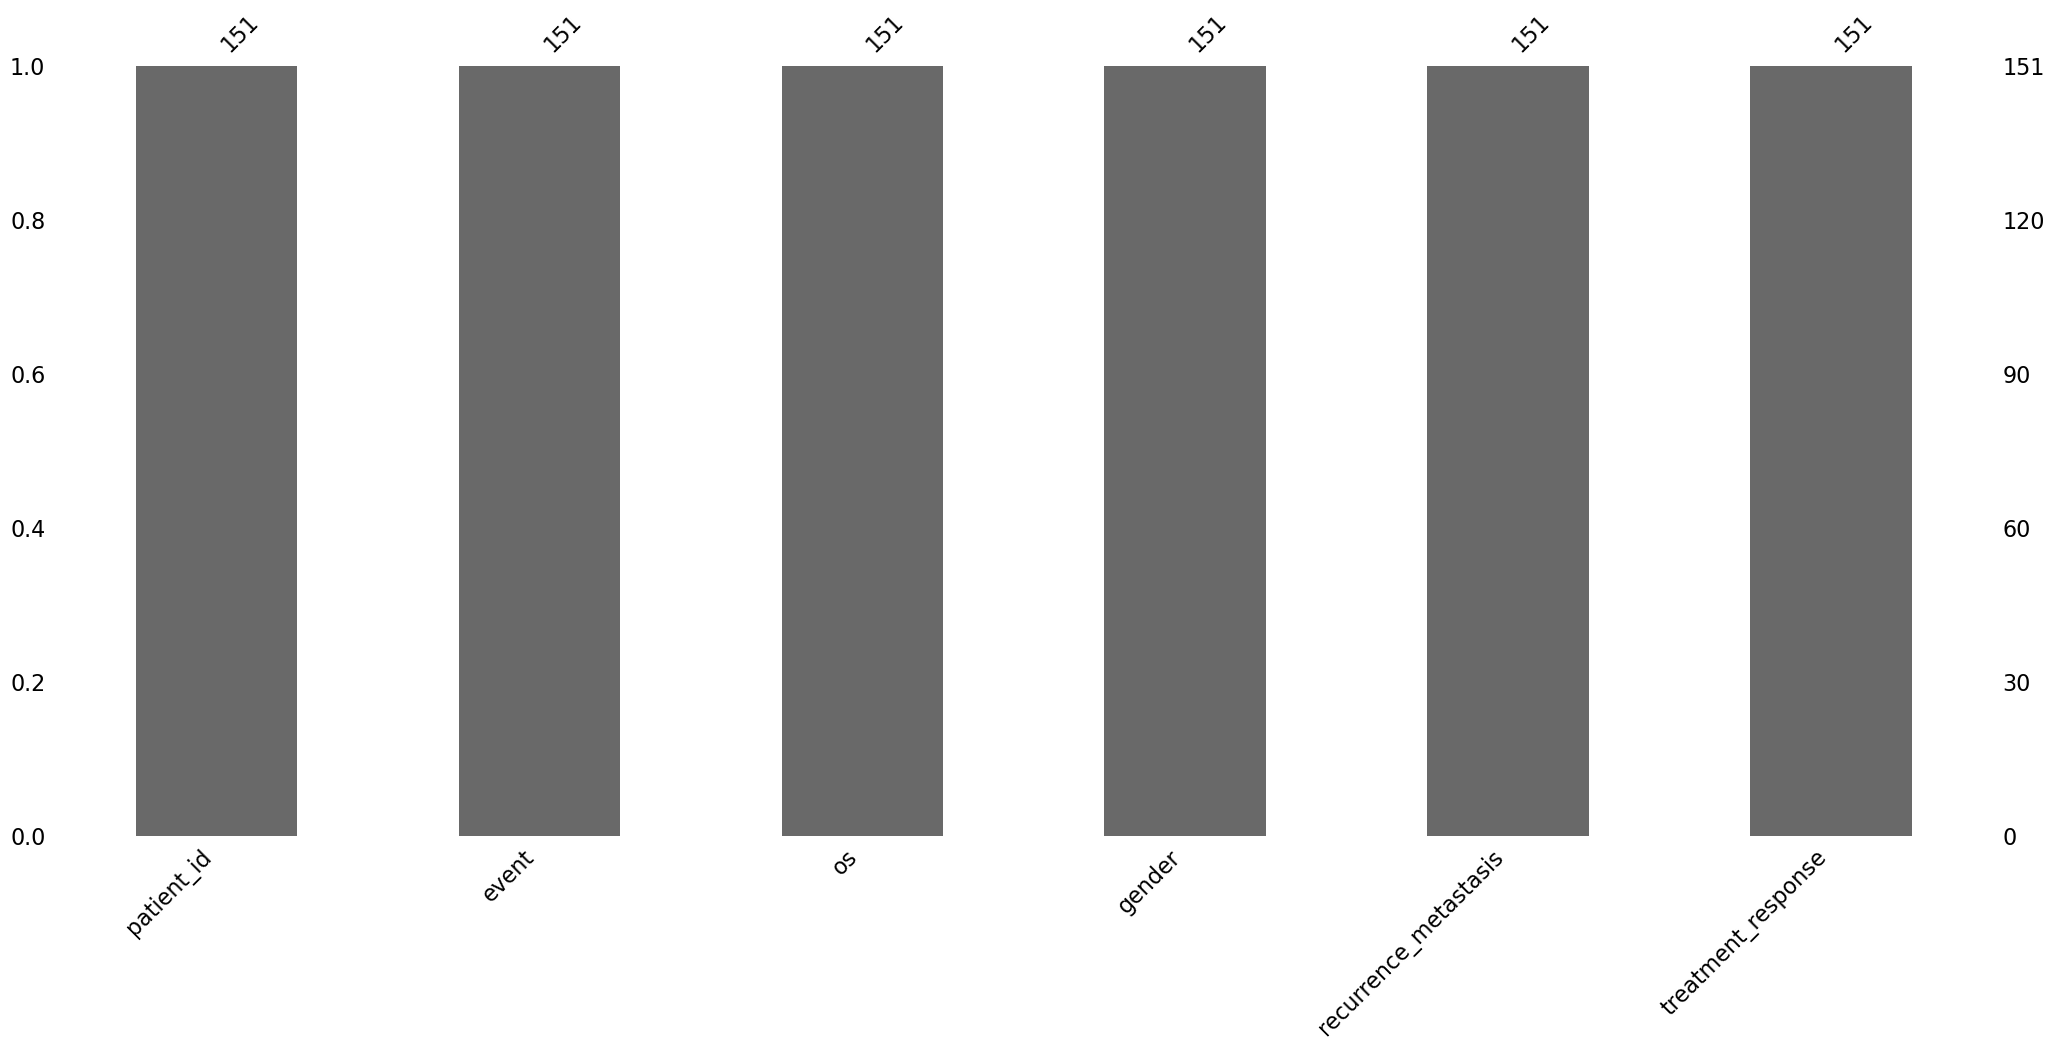

In [16]:
msno.bar(clinical_df)

<Axes: >

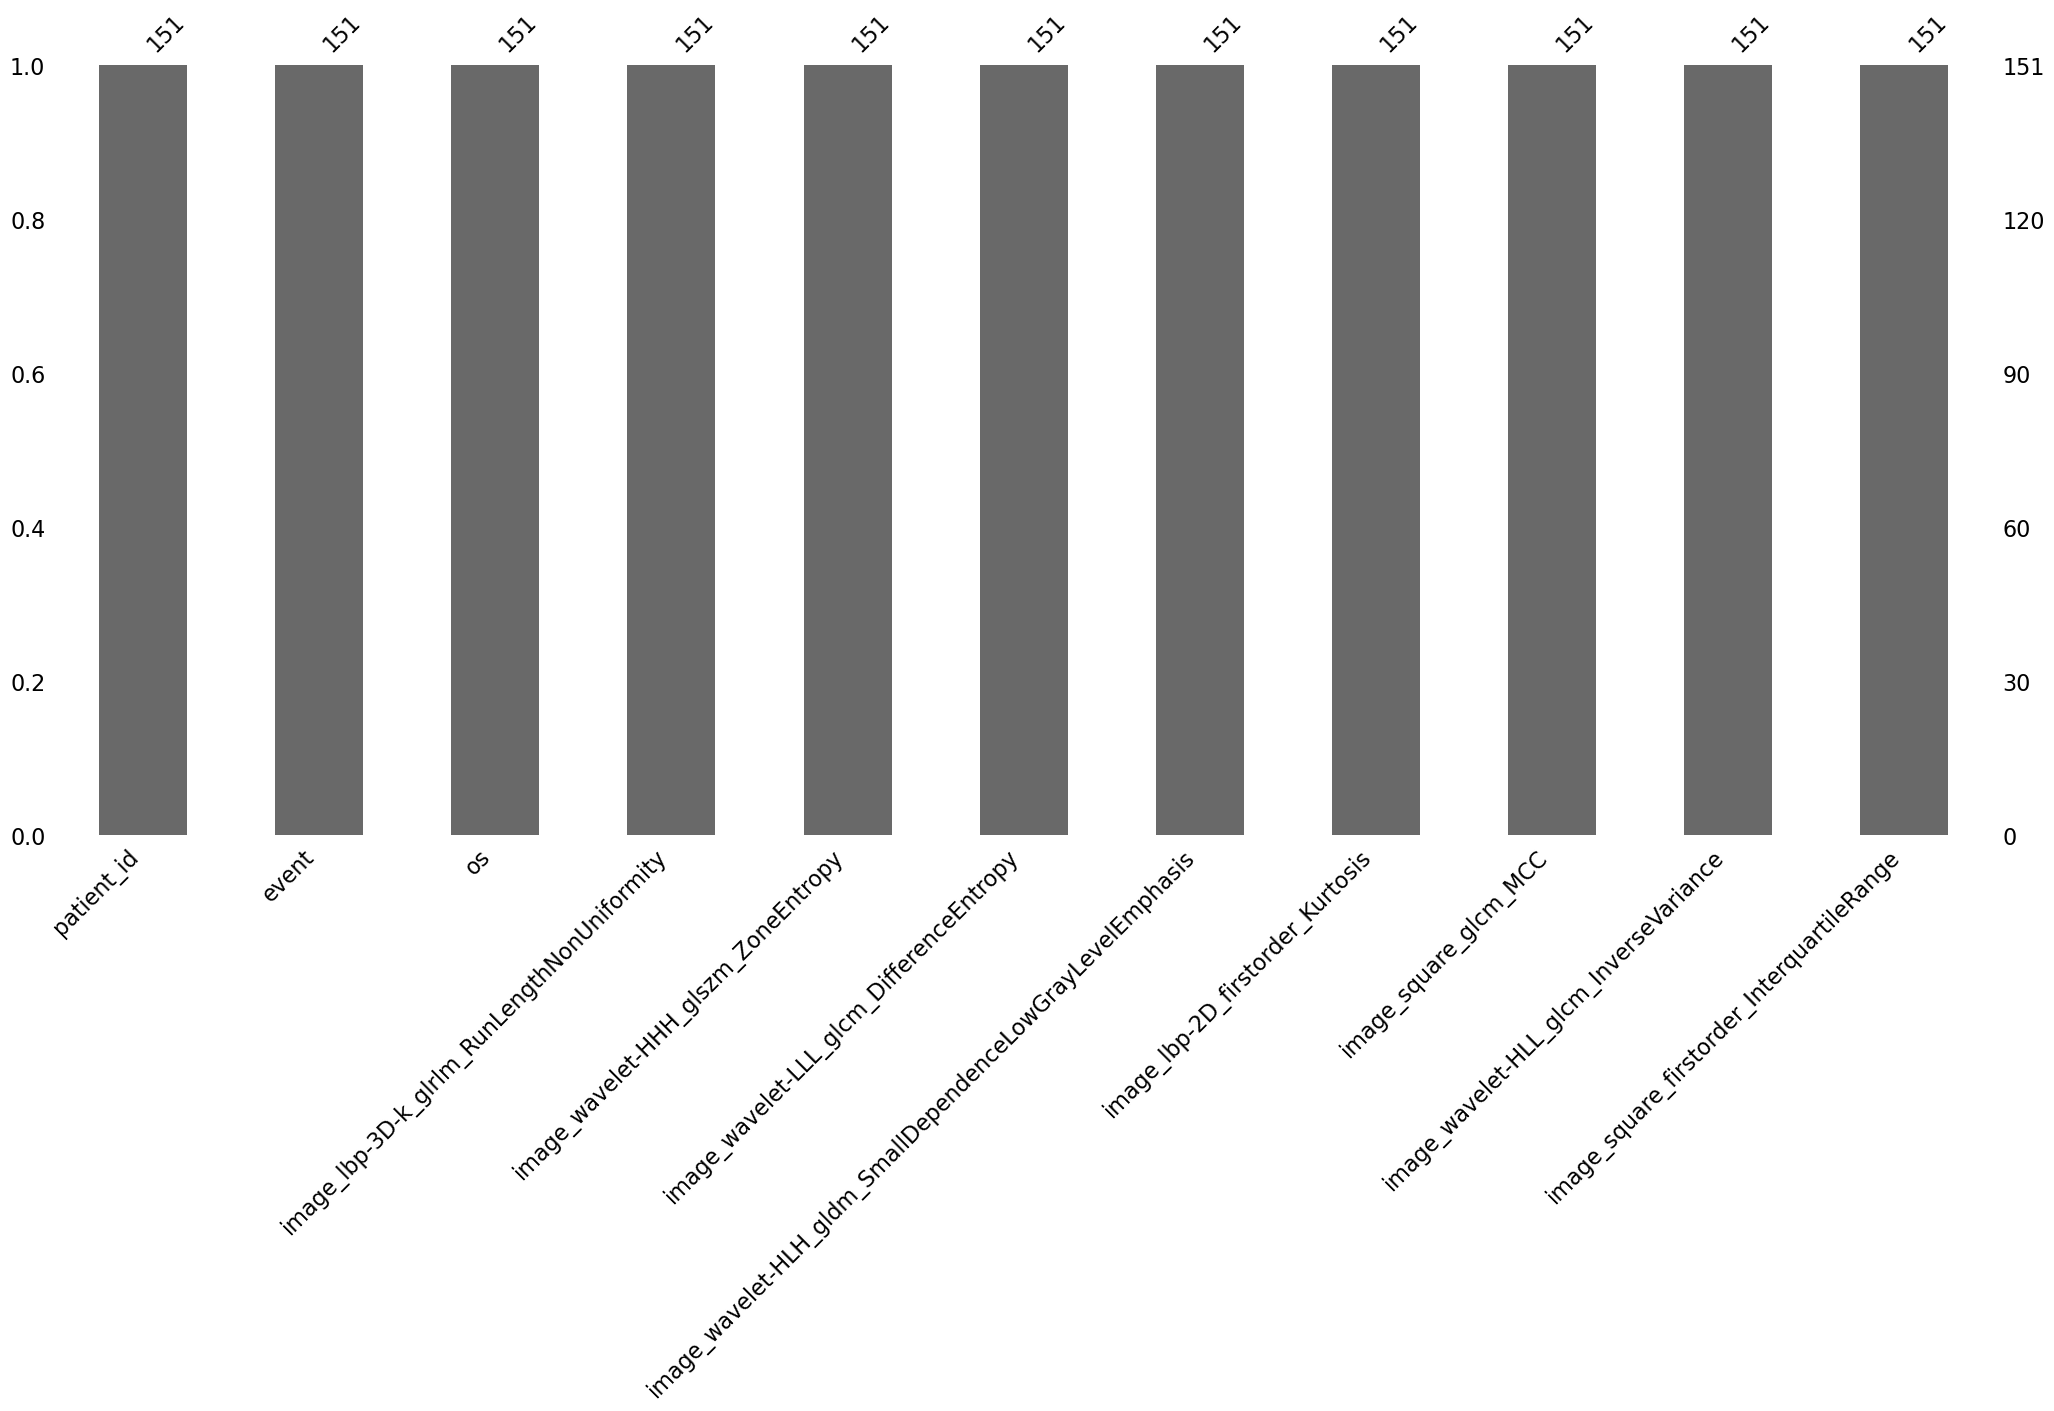

In [17]:
msno.bar(radiomics_df)

<Axes: >

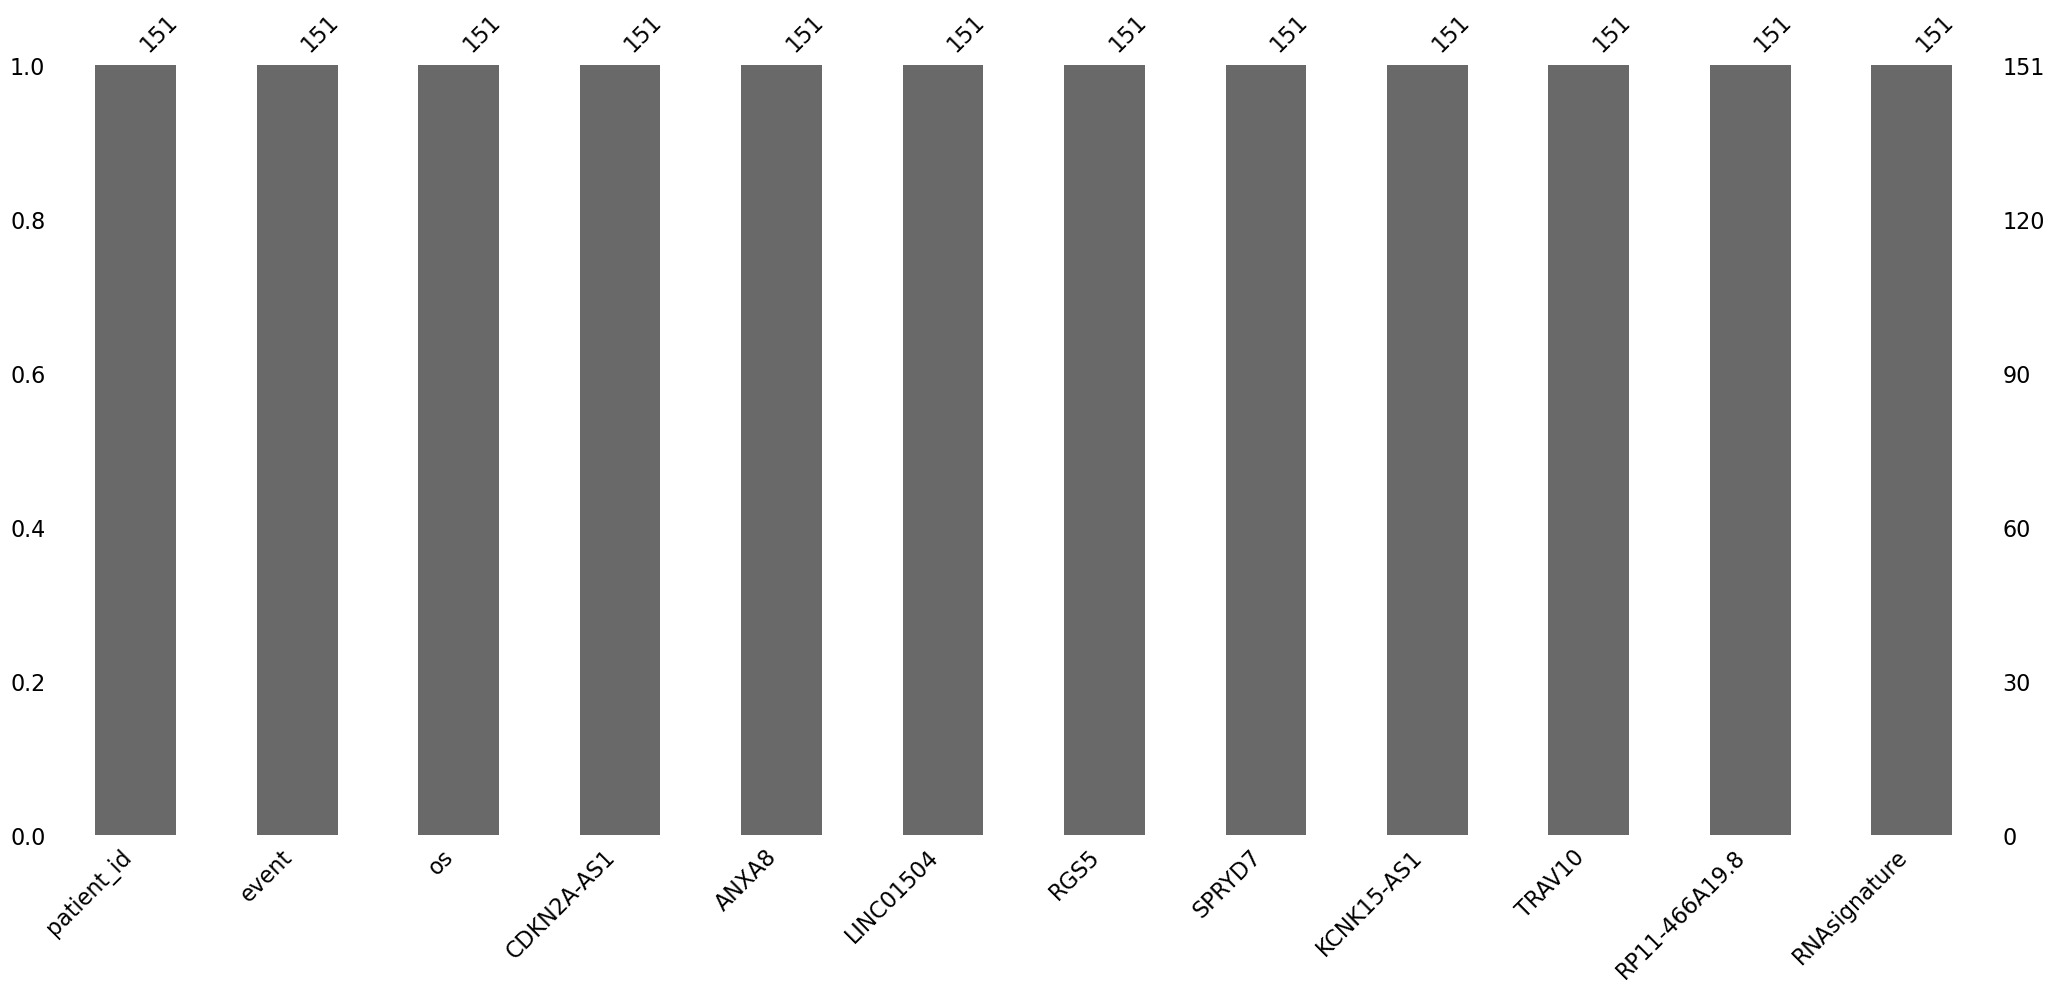

In [18]:
msno.bar(rna_features_df)

## No missing values found

In [19]:
rna_features_df.describe()

,patient_id,event,os,CDKN2A-AS1,ANXA8,LINC01504,RGS5,SPRYD7,KCNK15-AS1,TRAV10,RP11-466A19.8,RNAsignature
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,0.317881,1147.377483,0.113476,0.264494,0.130511,0.206344,0.357087,0.058376,0.094533,0.266556,0.370839
std,43.734045,0.467202,974.324455,0.176910,0.156594,0.137720,0.213126,0.196140,0.114249,0.147691,0.192875,0.246623
min,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.037981,0.000000,0.000000,0.000000,0.006060
25%,38.500000,0.000000,392.500000,0.000000,0.147989,0.033149,0.046981,0.214663,0.000000,0.000000,0.125000,0.153145
50%,76.000000,0.000000,930.000000,0.033708,0.235130,0.093923,0.128683,0.322596,0.024691,0.039216,0.250000,0.329760
75%,113.500000,1.000000,1493.000000,0.157303,0.355005,0.171271,0.307584,0.481250,0.061728,0.117647,0.375000,0.545795
max,151.000000,1.000000,5252.000000,1.000000,1.000000,0.878453,1.000000,1.000000,0.839506,1.000000,1.000000,0.976200


In [20]:
radiomics_df.describe()

,patient_id,event,os,image_lbp-3D-k_glrlm_RunLengthNonUniformity,image_wavelet-HHH_glszm_ZoneEntropy,image_wavelet-LLL_glcm_DifferenceEntropy,image_wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis,image_lbp-2D_firstorder_Kurtosis,image_square_glcm_MCC,image_wavelet-HLL_glcm_InverseVariance,image_square_firstorder_InterquartileRange
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,0.317881,1147.377483,-0.009661,-0.002190,0.012385,0.009688,-0.020270,0.026441,0.013860,-0.021536
std,43.734045,0.467202,974.324455,0.178101,0.140079,0.208742,0.181655,0.209802,0.402628,0.137683,0.195954
min,1.000000,0.000000,30.000000,-0.215942,-0.381931,-0.432608,-0.170632,-0.325173,-0.691902,-0.728262,-0.278787
25%,38.500000,0.000000,392.500000,-0.130111,-0.084981,-0.149712,-0.110728,-0.171418,-0.460899,-0.059513,-0.155344
50%,76.000000,0.000000,930.000000,-0.067722,-0.007013,-0.013149,-0.055556,-0.065839,0.308098,0.012998,-0.057737
75%,113.500000,1.000000,1493.000000,0.087092,0.066567,0.139855,0.070946,0.084868,0.308098,0.116050,0.080752
max,151.000000,1.000000,5252.000000,0.784058,0.618069,0.567392,0.826056,0.674827,0.308098,0.271738,0.721213


In [21]:
clinical_df.describe()

,patient_id,event,os,gender,recurrence_metastasis,treatment_response
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,0.384106,1175.264901,-0.039281,-0.003355,0.022439
std,43.734045,0.488002,1059.467242,0.985482,1.001340,0.980499
min,1.000000,0.000000,23.000000,-0.659047,-0.571929,-2.698617
25%,38.500000,0.000000,419.500000,-0.659047,-0.571929,0.494747
50%,76.000000,0.000000,950.000000,-0.659047,-0.571929,0.494747
75%,113.500000,1.000000,1507.000000,1.517342,-0.571929,0.494747
max,151.000000,1.000000,6417.000000,1.517342,1.748469,0.494747


<Axes: >

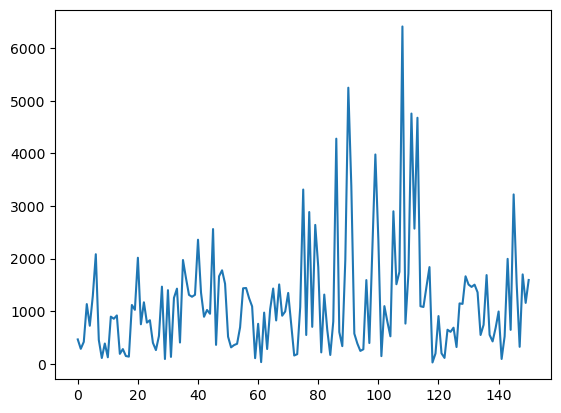

In [22]:
# Survival Times
clinical_df['os'].plot()

In [23]:
# Survival Time min and MAX
print("Clinical")
print(clinical_df.shape)
print(clinical_df['os'].min(), clinical_df['os'].max())

print("Radiomic")
print(radiomics_df['os'].min(), radiomics_df['os'].max())

print(radiomics_df.shape)

print("Genomics")
print(rna_features_df['os'].min(), rna_features_df['os'].max())
print(rna_features_df.shape)


Clinical
(151, 6)
23 6417
Radiomic
30 5252
(151, 11)
Genomics
30 5252
(151, 12)


### Different survival times???

- If they are same patients, how can they have different minimum for clinical? 
 
- Checking the ids would reveal, why this happened?

In [24]:
print("Clinical OS times:")
print(clinical_df['os'].describe())

print("\nRadiomics OS times:") 
print(radiomics_df['os'].describe())

print("\nGenomic OS times:")
print(rna_features_df['os'].describe())

Clinical OS times:
count     151.000000
mean     1175.264901
std      1059.467242
min        23.000000
25%       419.500000
50%       950.000000
75%      1507.000000
max      6417.000000
Name: os, dtype: float64

Radiomics OS times:
count     151.000000
mean     1147.377483
std       974.324455
min        30.000000
25%       392.500000
50%       930.000000
75%      1493.000000
max      5252.000000
Name: os, dtype: float64

Genomic OS times:
count     151.000000
mean     1147.377483
std       974.324455
min        30.000000
25%       392.500000
50%       930.000000
75%      1493.000000
max      5252.000000
Name: os, dtype: float64


In [25]:
common_patients = set(clinical_df['patient_id']) & set(radiomics_df['patient_id']) & set(rna_features_df['patient_id'])
print(f"Common patients: {len(common_patients)}")


common_clinical = clinical_df[clinical_df['patient_id'].isin(common_patients)]
common_radio = radiomics_df[radiomics_df['patient_id'].isin(common_patients)]
common_rna = rna_features_df[rna_features_df['patient_id'].isin(common_patients)]

print(f"clinical OS for common patients: {common_clinical['os'].describe()}")
print(f"radiomics OS for common patients: {common_radio['os'].describe()}")

Common patients: 151
clinical OS for common patients: count     151.000000
mean     1175.264901
std      1059.467242
min        23.000000
25%       419.500000
50%       950.000000
75%      1507.000000
max      6417.000000
Name: os, dtype: float64
radiomics OS for common patients: count     151.000000
mean     1147.377483
std       974.324455
min        30.000000
25%       392.500000
50%       930.000000
75%      1493.000000
max      5252.000000
Name: os, dtype: float64


In [26]:
os_clinical = clinical_df['os'].values
for i, os_clinical in enumerate(os_clinical):
    if os_clinical == radiomics_df['os'].values[i] == rna_features_df['os'].values[i]:
        print("-matched-", i, clinical_df['patient_id'].values[i], radiomics_df['patient_id'].values[i], rna_features_df['patient_id'].values[i],   os_clinical, radiomics_df['os'].values[i], rna_features_df['os'].values[i])
    else:
        print("----NOT MATCHED------", i, clinical_df['patient_id'].values[i], radiomics_df['patient_id'].values[i], rna_features_df['patient_id'].values[i],   os_clinical, radiomics_df['os'].values[i], rna_features_df['os'].values[i])


-matched- 0 1 1 1 462 462 462
-matched- 1 2 2 2 283 283 283
-matched- 2 3 3 3 415 415 415
-matched- 3 4 4 4 1134 1134 1134
-matched- 4 5 5 5 722 722 722
-matched- 5 6 6 6 1288 1288 1288
----NOT MATCHED------ 6 7 7 7 2083 520 520
----NOT MATCHED------ 7 8 8 8 451 1995 1995
----NOT MATCHED------ 8 9 9 9 108 2083 2083
----NOT MATCHED------ 9 10 10 10 384 644 644
----NOT MATCHED------ 10 11 11 11 122 451 451
----NOT MATCHED------ 11 12 12 12 895 108 108
----NOT MATCHED------ 12 13 13 13 855 384 384
----NOT MATCHED------ 13 14 14 14 918 122 122
----NOT MATCHED------ 14 15 15 15 187 895 895
----NOT MATCHED------ 15 16 16 16 278 855 855
----NOT MATCHED------ 16 17 17 17 146 918 918
----NOT MATCHED------ 17 18 18 18 134 187 187
----NOT MATCHED------ 18 19 19 19 1117 3221 3221
----NOT MATCHED------ 19 20 20 20 1025 278 278
----NOT MATCHED------ 20 21 21 21 2016 146 146
----NOT MATCHED------ 21 22 22 22 750 134 134
----NOT MATCHED------ 22 23 23 23 1168 1117 1117
----NOT MATCHED------ 23 24 24 2

## Well,  this reveals something interesting! 

Comparing the Patient Ids and OS times in three modalitites, looks likt there is mismatch in the patient ides . after 6th row the samples appear to have shifted a little. 

In [27]:
def find_matching(clinical_df, radio_df, rna_df): 
    matched_data = []
    used_radio_indices = set()
    used_rna_indices = set()
    
    for clin_idx, clin_row in clinical_df.iterrows():
        clin_os = clin_row['os']
        clin_event = clin_row['event']
         
        radio_candidates = radio_df[
            (radio_df['os'] == clin_os) & 
            (radio_df['event'] == clin_event) &
            (~radio_df.index.isin(used_radio_indices))
        ]
         
        rna_candidates = rna_df[
            (rna_df['os'] == clin_os) & 
            (rna_df['event'] == clin_event) &
            (~rna_df.index.isin(used_rna_indices))
        ]
         
        if len(radio_candidates) == 1 and len(rna_candidates) == 1:
            radio_idx = radio_candidates.index[0]
            rna_idx = rna_candidates.index[0]
             
            used_radio_indices.add(radio_idx)
            used_rna_indices.add(rna_idx)
            
            matched_data.append({
                'clinical_idx': clin_idx,
                'radio_idx': radio_idx,
                'rna_idx': rna_idx,
                'patient_id': radio_candidates.iloc[0]['patient_id']
            })
    
    return matched_data
 
matched_patients = find_matching(clinical_df, radiomics_df, rna_features_df)
print(f"matching found {len(matched_patients)} patients")

matching found 113 patients


In [28]:
matched_patients

[{'clinical_idx': 0, 'radio_idx': 0, 'rna_idx': 0, 'patient_id': 1.0},
 {'clinical_idx': 1, 'radio_idx': 1, 'rna_idx': 1, 'patient_id': 2.0},
 {'clinical_idx': 2, 'radio_idx': 2, 'rna_idx': 2, 'patient_id': 3.0},
 {'clinical_idx': 3, 'radio_idx': 3, 'rna_idx': 3, 'patient_id': 4.0},
 {'clinical_idx': 4, 'radio_idx': 4, 'rna_idx': 4, 'patient_id': 5.0},
 {'clinical_idx': 5, 'radio_idx': 5, 'rna_idx': 5, 'patient_id': 6.0},
 {'clinical_idx': 6, 'radio_idx': 8, 'rna_idx': 8, 'patient_id': 9.0},
 {'clinical_idx': 7, 'radio_idx': 10, 'rna_idx': 10, 'patient_id': 11.0},
 {'clinical_idx': 8, 'radio_idx': 11, 'rna_idx': 11, 'patient_id': 12.0},
 {'clinical_idx': 9, 'radio_idx': 12, 'rna_idx': 12, 'patient_id': 13.0},
 {'clinical_idx': 10, 'radio_idx': 13, 'rna_idx': 13, 'patient_id': 14.0},
 {'clinical_idx': 11, 'radio_idx': 14, 'rna_idx': 14, 'patient_id': 15.0},
 {'clinical_idx': 12, 'radio_idx': 15, 'rna_idx': 15, 'patient_id': 16.0},
 {'clinical_idx': 13, 'radio_idx': 16, 'rna_idx': 16, 'p

In [29]:
# Prepare clean data
clinical_clean = clinical_df.iloc[[m['clinical_idx'] for m in matched_patients]].copy()
radio_clean = radiomics_df.iloc[[m['radio_idx'] for m in matched_patients]].copy()
rna_clean = rna_features_df.iloc[[m['rna_idx'] for m in matched_patients]].copy()

# ensure clean data based on radiomic data
clinical_clean['patient_id'] = [m['patient_id'] for m in matched_patients]
rna_clean['patient_id'] = [m['patient_id'] for m in matched_patients]

print(f"Clean datasets: Clinical={len(clinical_clean)}, Radiomics={len(radio_clean)}, RNA={len(rna_clean)}")

Clean datasets: Clinical=113, Radiomics=113, RNA=113


In [30]:
# Check AGAIN
os_clinical = clinical_clean['os'].values
for i, os_clinical in enumerate(os_clinical):
    if os_clinical == radio_clean['os'].values[i] == rna_clean['os'].values[i]:
        print("-matched-", i, clinical_clean['patient_id'].values[i], radio_clean['patient_id'].values[i], rna_clean['patient_id'].values[i],   os_clinical, radio_clean['os'].values[i], rna_clean['os'].values[i])
    else:
        print("-NOT MATCHED-", i, clinical_clean['patient_id'].values[i], radio_clean['patient_id'].values[i], rna_clean['patient_id'].values[i],   os_clinical, radio_clean['os'].values[i], rna_clean['os'].values[i])


-matched- 0 1.0 1 1.0 462 462 462
-matched- 1 2.0 2 2.0 283 283 283
-matched- 2 3.0 3 3.0 415 415 415
-matched- 3 4.0 4 4.0 1134 1134 1134
-matched- 4 5.0 5 5.0 722 722 722
-matched- 5 6.0 6 6.0 1288 1288 1288
-matched- 6 9.0 9 9.0 2083 2083 2083
-matched- 7 11.0 11 11.0 451 451 451
-matched- 8 12.0 12 12.0 108 108 108
-matched- 9 13.0 13 13.0 384 384 384
-matched- 10 14.0 14 14.0 122 122 122
-matched- 11 15.0 15 15.0 895 895 895
-matched- 12 16.0 16 16.0 855 855 855
-matched- 13 17.0 17 17.0 918 918 918
-matched- 14 18.0 18 18.0 187 187 187
-matched- 15 20.0 20 20.0 278 278 278
-matched- 16 21.0 21 21.0 146 146 146
-matched- 17 22.0 22 22.0 134 134 134
-matched- 18 23.0 23 23.0 1117 1117 1117
-matched- 19 24.0 24 24.0 1025 1025 1025
-matched- 20 26.0 26 26.0 2016 2016 2016
-matched- 21 27.0 27 27.0 750 750 750
-matched- 22 28.0 28 28.0 1168 1168 1168
-matched- 23 29.0 29 29.0 782 782 782
-matched- 24 31.0 31 31.0 827 827 827
-matched- 25 34.0 34 34.0 397 397 397
-matched- 26 35.0 35 3

#### All Matched NOW.

This was am attempt to match the patient IDs. Although , this matching technique may not be accurate if two patients had same os and event values. Being a secondary data, we do not have access to any information which can verify this..


For the sake of our experiments we can proceeed with the cleanded data with 113 patients in each omic madality.

In [31]:
# saving cleanded dta for future

clinical_clean.to_csv(f"{data_dir}/cleaned_clinical.csv", index=False)
radio_clean.to_csv(f"{data_dir}/cleaned_radio.csv", index=False)
rna_clean.to_csv(f"{data_dir}/cleaned_rna.csv", index=False)